In [22]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler;
import seaborn as sns;

In [3]:
df =pd.read_csv("./train.csv");
display(df.head(2));

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1


In [4]:
print("Number of rows=",len(df));

Number of rows= 41348


In [5]:
cols=df.columns.tolist();
print("Columns ",cols);

Columns  ['neighbourhood_group', 'room_type', 'minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365', 'price_class']


In [6]:
print("================= DATA TYPES ====================");
print(df.dtypes);

================= DATA TYPES ====================
neighbourhood_group     object
room_type               object
minimum_nights         float64
amenity_score          float64
number_of_reviews      float64
availability_365       float64
price_class              int64
dtype: object


In [7]:
target_col=df[["price_class"]];

display(target_col.head(2));
print("Unique Values==> ", df["price_class"].unique());

,price_class
0,3
1,1


Unique Values==>  [3 1 0 2]


In [8]:
null_values = df.isna();
print(null_values.sum());

neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int64


In [9]:
#Replacing Categorical Features with Mode

mode_neighbourhood_group=df["neighbourhood_group"].mode()[0];
df["neighbourhood_group"].fillna(value=mode_neighbourhood_group,inplace=True);

mode_neighbourhood_group=df["room_type"].mode()[0];
df["room_type"].fillna(value=mode_neighbourhood_group,inplace=True);



/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_32151/1355574522.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["neighbourhood_group"].fillna(value=mode_neighbourhood_group,inplace=True);
/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_32151/1355574522.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [10]:
#Replacing Numerical Features with Median

minimum_nights_group=df["minimum_nights"].median();
df["minimum_nights"].fillna(value=minimum_nights_group,inplace=True);

mode_amenity_score=df["amenity_score"].median();
df["amenity_score"].fillna(value=mode_amenity_score,inplace=True);

mode_number_of_reviews=df["number_of_reviews"].median();
df["number_of_reviews"].fillna(value=mode_number_of_reviews,inplace=True);

mode_availability_365=df["availability_365"].median();
df["availability_365"].fillna(value=mode_availability_365,inplace=True);





/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_32151/3983291487.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["minimum_nights"].fillna(value=minimum_nights_group,inplace=True);
/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_32151/3983291487.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [11]:
null_values = df.isna();
print(null_values.sum());

neighbourhood_group    0
room_type              0
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
price_class            0
dtype: int64


<Axes: ylabel='Frequency'>

[3 1 0 2]


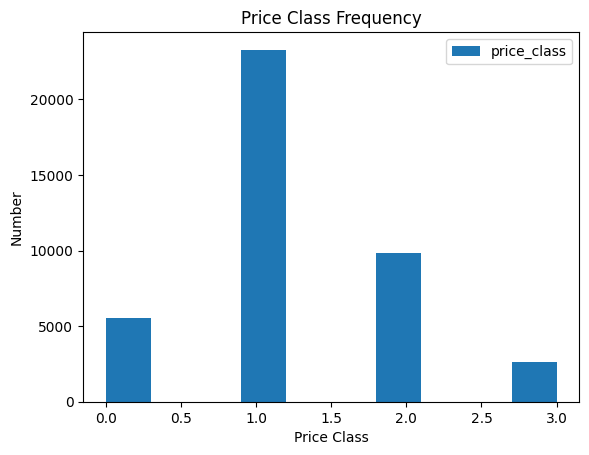

In [12]:
display(df[["price_class"]].plot.hist());
plt.xlabel("Price Class");
plt.ylabel("Number");
plt.title("Price Class Frequency");

print(df["price_class"].unique())

In [14]:
#Encode Categorical Variables
display(df[["neighbourhood_group"]].sample(2));
display(df[["room_type"]].sample(2));
df_encoded = pd.get_dummies(df);



,neighbourhood_group
35953,Brooklyn
13322,Brooklyn


,room_type
10836,Entire home/apt
14224,Private room


In [16]:
display(df_encoded.head(5));

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2.0,82.5,15.0,254.0,3,False,False,True,False,False,True,False,False
1,2.0,53.7,1.0,0.0,1,False,False,True,False,False,False,True,False
2,2.0,47.8,70.0,90.0,1,False,True,False,False,False,False,True,False
3,2.0,58.8,1.0,44.0,1,False,False,True,False,False,True,False,False
4,2.0,32.2,0.0,89.0,1,True,False,False,False,False,False,True,False


In [17]:
colums_to_scale=["minimum_nights","amenity_score","number_of_reviews","availability_365"];
scaler=StandardScaler();
df_encoded[colums_to_scale]=scaler.fit(df_encoded[colums_to_scale]);

In [18]:
display(df_encoded.head(5));

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),3,False,False,True,False,False,True,False,False
1,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),1,False,False,True,False,False,False,True,False
2,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),1,False,True,False,False,False,False,True,False
3,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),1,False,False,True,False,False,True,False,False
4,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),1,True,False,False,False,False,False,True,False


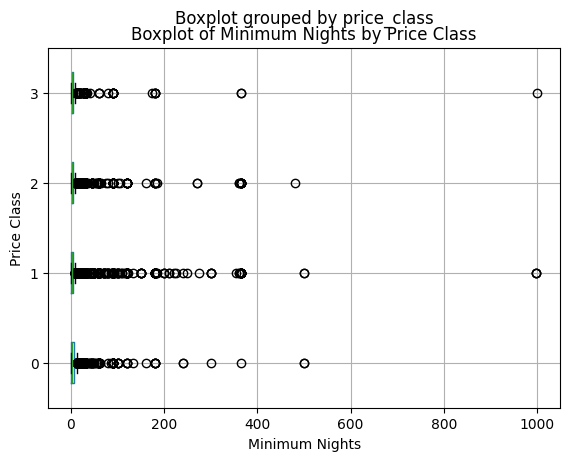

In [26]:

df.boxplot(column="minimum_nights", by="price_class", vert=False)
plt.xlabel("Minimum Nights");
plt.ylabel("Price Class");
plt.title("Boxplot of Minimum Nights by Price Class");

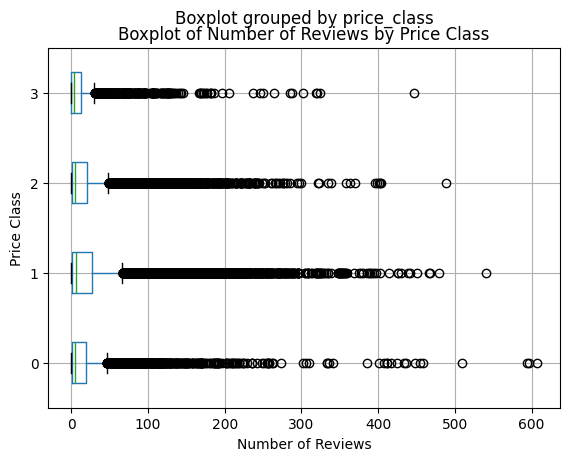

In [28]:
df.boxplot(column="number_of_reviews", by="price_class", vert=False)
plt.xlabel("Number of Reviews");
plt.ylabel("Price Class");
plt.title("Boxplot of Number of Reviews by Price Class");



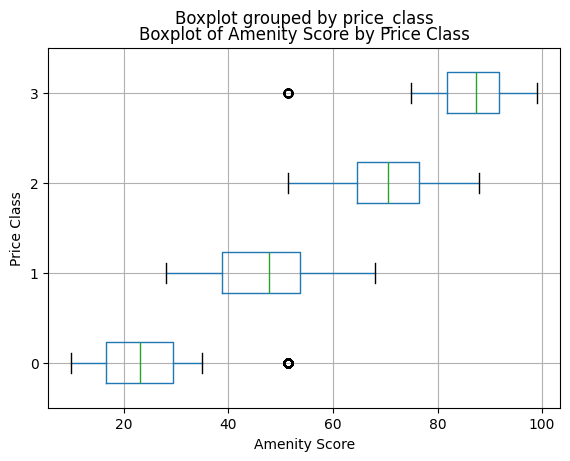

In [29]:


df.boxplot(column="amenity_score", by="price_class", vert=False)
plt.xlabel("Amenity Score");
plt.ylabel("Price Class");
plt.title("Boxplot of Amenity Score by Price Class");



In [ ]:
df.boxplot(column="availability_365", by="price_class", vert=False)
plt.xlabel("Availability");
plt.ylabel("Price Class");
plt.title("Boxplot of Availability by Price Class");

In [30]:
corr = df_encoded.corr(numeric_only=True);

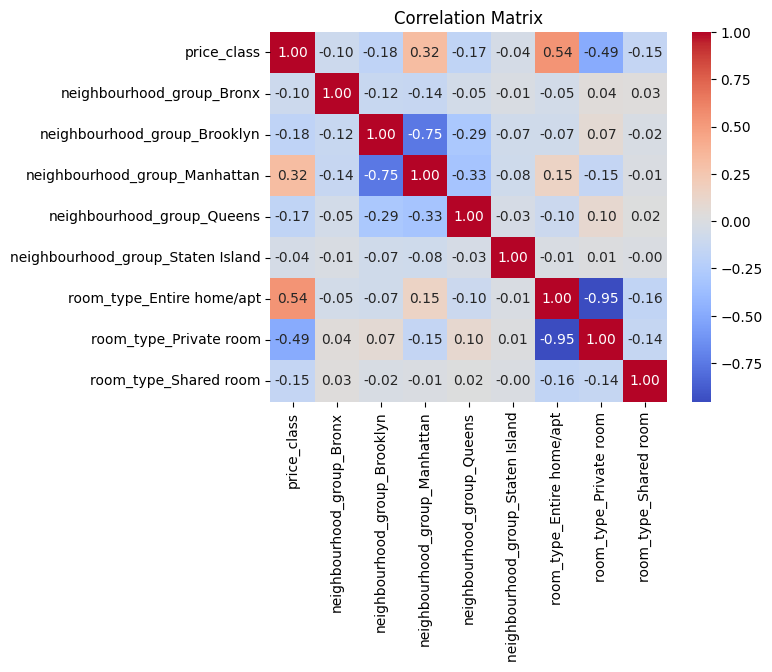

In [31]:
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix")
plt.show()